# Classifying Whiskies

In this case study, we will classify scotch whiskies based on their flavor characteristics.
The dataset we'll be using consists of tasting ratings of one readily available single malt scotch whisky from almost every active whisky distillery in Scotland. The resulting dataset has 86 malt whiskies that are scored between 0 and 4 in 12 different taste categories. The scores have been aggregated from 10 different tasters. The taste categories describe whether the whiskies are sweet, smoky, medicinal, spicy, and so on.

In [31]:
import numpy as np
import pandas as pd

whisky = pd.read_csv("whiskies.txt")
whisky.Region = pd.read_csv("regions.txt")

In [32]:
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,PH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,AB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,AB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,PA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,AB54 4NH,355350,829140


In [33]:
whisky.tail()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850


In [34]:
whisky.iloc[0:10]

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,PH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,AB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,AB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,PA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,AB54 4NH,355350,829140
5,6,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950
6,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610
7,8,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,AB55 3XS,340754,848623
8,9,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,AB55 3QY,340754,848623
9,10,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,IV19 1LB,270820,885770


In [35]:
whisky.iloc[5:10, 0:5]

,RowID,Distillery,Body,Sweetness,Smoky
5,6,ArranIsleOf,2,3,1
6,7,Auchentoshan,0,2,0
7,8,Auchroisk,2,3,1
8,9,Aultmore,2,2,1
9,10,Balblair,2,3,2


In [36]:
whisky.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude'],
      dtype='object')

In [37]:
flavors = whisky.iloc[:,2:14]

In [40]:
flavors.head(10)

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
5,2,3,1,1,0,1,1,1,0,1,1,2
6,0,2,0,0,0,1,1,0,2,2,3,3
7,2,3,1,0,0,2,1,2,2,2,2,1
8,2,2,1,0,0,1,0,0,2,2,2,2
9,2,3,2,1,0,0,2,0,2,1,2,1


In [42]:
corr_flavors = pd.DataFrame.corr(flavors)
print(corr_flavors)

               Body  Sweetness     Smoky  Medicinal   Tobacco     Honey  \
Body       1.000000  -0.136518  0.524032   0.354050  0.168718  0.082031   
Sweetness -0.136518   1.000000 -0.405897  -0.392017 -0.147871  0.132558   
Smoky      0.524032  -0.405897  1.000000   0.686071  0.365501 -0.195318   
Medicinal  0.354050  -0.392017  0.686071   1.000000  0.425106 -0.396629   
Tobacco    0.168718  -0.147871  0.365501   0.425106  1.000000 -0.275490   
Honey      0.082031   0.132558 -0.195318  -0.396629 -0.275490  1.000000   
Spicy      0.188500  -0.054200  0.231745   0.044903  0.054068  0.139563   
Winey      0.408576   0.115727 -0.028190  -0.202651  0.009097  0.362021   
Nutty      0.126323  -0.032493 -0.023132  -0.113671 -0.117717  0.188492   
Malty     -0.116859  -0.001516 -0.192875  -0.258959 -0.059347  0.310184   
Fruity    -0.013205   0.019820 -0.312970  -0.330975 -0.235145  0.108822   
Floral    -0.461203   0.144987 -0.431663  -0.511323 -0.212375  0.183029   

              Spicy     

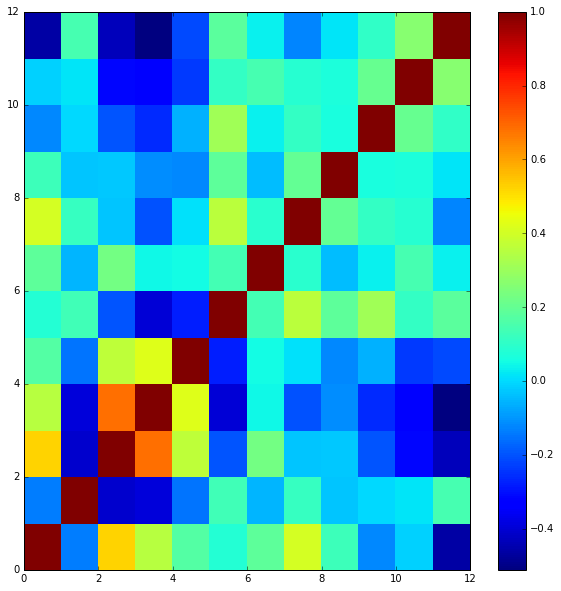

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.pcolor(corr_flavors)
plt.colorbar()
plt.savefig("corr_flavors.png")

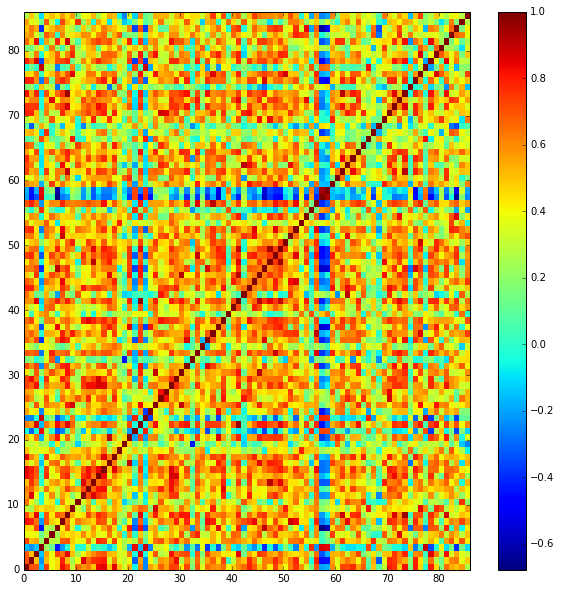

In [47]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())

plt.figure(figsize=(10,10))
plt.pcolor(corr_whisky)
plt.axis("tight")
plt.colorbar()
plt.savefig("corr_whisky.png")

In [ ]:
# to be continued ...

Here is a quick tutorial of pandas which is a general library for manipulating 1d and 2d arrays of data of various types.
Pandas has two data structures: 
- Series is a one-dimensional array-like object,
- Data Frame is a two-dimensional array-like object.

In [1]:
import pandas as pd

x = pd.Series([6,3,8,6])
x

0    6
1    3
2    8
3    6
dtype: int64

In [16]:
x = pd.Series([6,3,8,6], index=["q","w","e","r"])
x

q    6
w    3
e    8
r    6
dtype: int64

In [17]:
x["e"]

8

In [18]:
x[["r", "w"]]

r    6
w    3
dtype: int64

In [23]:
print(x.index,"\nsorted Index: ", sorted(x.index))

Index(['q', 'w', 'e', 'r'], dtype='object') 
sorted Index:  ['e', 'q', 'r', 'w']


In [24]:
x.reindex(sorted(x.index))

e    8
q    6
r    6
w    3
dtype: int64

In [25]:
x = pd.Series([6,3,8,6], index=["q","w","e","r"])
y = pd.Series([10,5,6,1], index=["a", "b", "q", "w"])
x+y

a   NaN
b   NaN
e   NaN
q    12
r   NaN
w     4
dtype: float64

In [7]:
age = {"Tim":29, "Jim":31, "Pam":27, "Sam":35}

In [9]:
pd.Series(age)

Jim    31
Pam    27
Sam    35
Tim    29
dtype: int64

In [10]:
data = {'name':["Tim", "Jim", "Pam", "Sam"],
        'age':[29, 31, 27, 35],
       'ZIP': ['02119', '02130', '65768', '78797']}

In [11]:
x = pd.DataFrame(data, columns=["name", "age", "ZIP"])
x

,name,age,ZIP
0,Tim,29,02119
1,Jim,31,02130
2,Pam,27,65768
3,Sam,35,78797


In [12]:
x.name

0    Tim
1    Jim
2    Pam
3    Sam
Name: name, dtype: object

In [13]:
 x["name"]

0    Tim
1    Jim
2    Pam
3    Sam
Name: name, dtype: object